# Understanding Descriptive Statistics

Import the necessary libraries here:

In [140]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas._libs import lib
from pandas._libs.interval import (
    Interval,
    IntervalMixin,
    IntervalTree,
)
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [39]:
def dice():
    sequence=[1,2,3,4,5,6]
    df=pd.DataFrame({'Time':random.choices(sequence, k=10)})
    return df
df=dice()
df

,Time
0,3
1,6
2,6
3,4
4,1
5,5
6,2
7,1
8,2
9,3


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

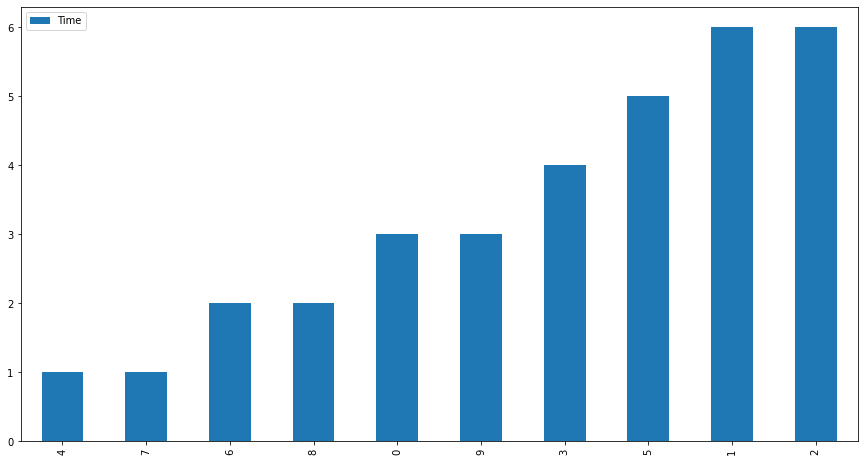

In [50]:
# your code here
df.sort_values(by=["Time"], inplace=True)
df.plot.bar(figsize=(15,8))

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

1    2
2    2
3    2
6    2
4    1
5    1
Name: Time, dtype: int64


<AxesSubplot:>

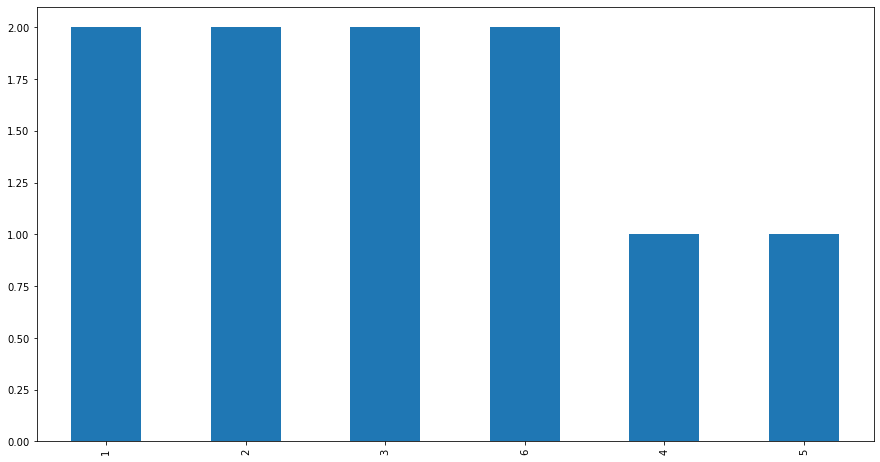

In [55]:
# your code here
freq=df['Time'].value_counts()
print(freq)
freq.plot.bar(figsize=(15,8))

In [ ]:
"""
your comments here

the accumulative of frequencies is taken into account
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [59]:
# your code here
def mean():
    suma=0
    for i in df['Time']:
        suma+=i
    print("Mean:",suma/len(df['Time']))
    return

mean()

Mean: 3.3


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [99]:
# your code here
ana=pd.crosstab(index=df['Time'], columns='count')
ana


col_0,count
Time,
1,2
2,2
3,2
4,1
5,1
6,2


In [97]:

mean=ana['count'].sum()/len(ana['count'])
    
print("Mean:",mean)

Mean: 1.6666666666666667


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [130]:
# your code here
def median(data):
    data = data.sort_values(by='Time', ascending=True)
    len_df = len(data)
    if len_df %2 != 0:
        median = data.iloc[(len_df+1)/2-1]
    else:
        median = (data.iloc[int((len_df/2)-1)] + data.iloc[int(len_df/2)])/2
    return median
median(df)

Time     3.0
count    NaN
dtype: float64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [133]:
# your code here
df.sort_values(by='Time', inplace=True)

def quartiles(dataframe):
    midlist = int(len(df.Time)//2)+1
    q1 = df[:midlist]
    q3 = df[midlist:]
    print('q1:',median(q1))
    print('q2:',median(df))
    print('q3:',median(q3))
quartiles(df)

q1:  Time     2.0
count    NaN
dtype: float64
q2:  Time     3.0
count    NaN
dtype: float64
q3:  Time     5.5
count    1.5
dtype: float64


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

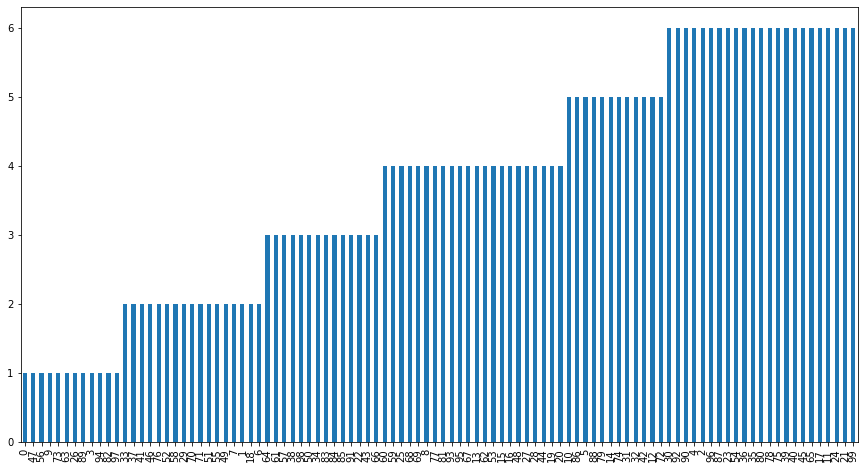

In [149]:
# your code here
df=pd.read_csv('/Users/anak/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/roll_the_dice_hundred.csv')
df.sort_values(by='value', inplace=True)
df['value'].plot.bar(figsize=(15,8))

In [ ]:
"""
your comments here
it looks proportional frequencies
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [155]:
# your code heredef mean():
def mean(n):
    suma=0
    for i in n:
        suma+=i
    print("Mean:",suma/len(n))
    return

mean(df['value'])


Mean: 3.74


#### 3.- Now, calculate the frequency distribution.


In [158]:
# your code here

freq = df.groupby('value').agg({'value':'count'})
freq

,value
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value', ylabel='Count'>

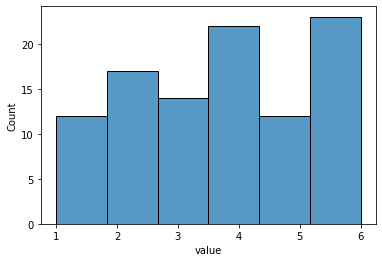

In [160]:
# your code here
sns.histplot(data=df, x='value', bins=6)

In [ ]:
"""
not normal distribution 
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:xlabel='value', ylabel='Count'>

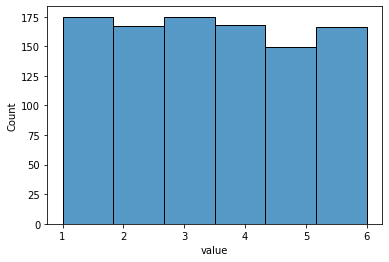

In [162]:
# your code here
df=pd.read_csv('/Users/anak/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/roll_the_dice_thousand.csv')
sns.histplot(data=df, x='value', bins=6)

In [ ]:
"""
The data are more homogenous
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:xlabel='observation', ylabel='Count'>

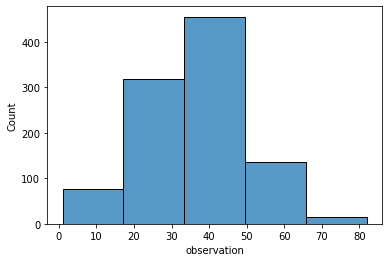

In [166]:
# your code here
df=pd.read_csv('/Users/anak/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/ages_population.csv')
df.head()
sns.histplot(data=df, x='observation', bins=5)

#mean between 30 and 40 , std close to 0

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [170]:
# your code here
print(df.observation.mean(),"mean")
print(df.observation.std(),"std")

36.56 mean
12.816499625976762 std


In [ ]:
"""
mean yes
std no 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:xlabel='observation', ylabel='Count'>

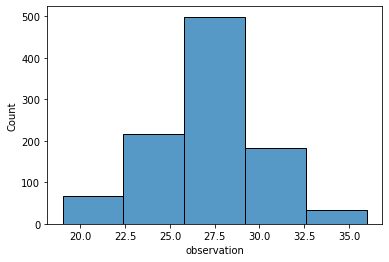

In [171]:
# your code here
df=pd.read_csv('/Users/anak/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/ages_population2.csv')
df.head()
sns.histplot(data=df, x='observation', bins=5)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
data are more centralized
mean shoud be close to 27.5
std similar to zero and lower than in the step 1 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [172]:
# your code here
print(df.observation.mean(),"mean")
print(df.observation.std(),"std")

27.155 mean
2.969813932689186 std


In [ ]:
"""
data are more centralized
std similar to zero and lower than in the step 1 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:xlabel='observation', ylabel='Count'>

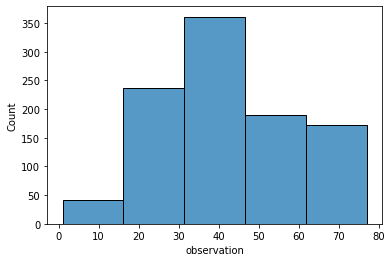

In [175]:
# your code here
df=pd.read_csv('/Users/anak/DAFT_NOV_21_01-main/module_2/Lab_4_Descriptive_Statistics/ages_population3.csv')
df.head()
sns.histplot(data=df, x='observation', bins=5)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [176]:
# your code here
print(df.observation.mean(),"mean")
print(df.observation.std(),"std")

41.989 mean
16.144705959865934 std


In [ ]:
"""
your comments here
mean close to the center, std big
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [182]:
# your code here
print(np.quantile(df.observation, .50),"median")
c
print(np.quantile(df.observation, .75),"q3")


40.0 median
30.0 q1
53.0 q3
77.0 q4


77.0

In [ ]:
"""
the difference between the mean and the median is not big. the distribution between the quartiles is homogenous
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [183]:
# your code here
print(np.quantile(df.observation, .1),"q.1")
print(np.quantile(df.observation, .2),"q.2")
print(np.quantile(df.observation, .3),"q.3")
print(np.quantile(df.observation, .4),"q.4")
print(np.quantile(df.observation, .5),"q.5")
print(np.quantile(df.observation, .6),"q.6")
print(np.quantile(df.observation, .7),"q.7")
print(np.quantile(df.observation, .8),"q.8")
print(np.quantile(df.observation, .9),"q.9")

22.0 q.1
28.0 q.2
32.0 q.3
36.0 q.4
40.0 q.5
45.0 q.6
50.0 q.7
57.0 q.8
67.0 q.9


In [ ]:
"""
the differences between the quartiles before the mean is different to the difference after the mean

"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""